A. DATA IMPORT & EXPORT

DATA AT A FIRST GLANCE
There are 4 files provided by NHS and we import all of them and check the basic information together. 
3 of the files were considered obtained from NHS internal system 
but the source of the tweets file was not indicated and by what means


In [305]:
# There are 4 files provided by NHS and we import all of them
# and check the basic information together

import pandas as pd

# import the files obtained from NHS
nc = pd.read_excel("national_categories.xlsx")
ar = pd.read_csv("appointments_regional.csv")
ad = pd.read_csv("actual_duration.csv")
tweets = pd.read_csv("tweets.csv")

In [325]:
# Check the nc dataframe structure and data types
print("There are [{0},{1},{2}] in the nc, ar and ac dataframe respectively.\n".
      format(nc.shape, ar.shape,ad.shape))

# It is found that the column's names:
# 'icb_ons_code' and 'count_of_appointments'  
# are existing in common to all 3 dataframes
print("Data Types in nc dataframe:\n", nc.dtypes,"\n")
print("Data Types in ar dataframe:\n", ar.dtypes,"\n")
print("Data Types in ad dataframe:\n", ad.dtypes,"\n")

There are [(817394, 8),(596821, 7),(137793, 8)] in the nc, ar and ac dataframe respectively.

Data Types in nc dataframe:
 appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object 

Data Types in ar dataframe:
 icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object 

Data Types in ad dataframe:
 sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code

In [328]:
# Check the dataframe if there is any NA value
print("null value in nc dataframe:\n",nc.isna().sum(),"\n")
print("null value in ar dataframe:\n",ar.isna().sum(),"\n")
print("null value in ad dataframe:\n",ad.isna().sum(),"\n")

null value in nc dataframe:
 appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64 

null value in ar dataframe:
 icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64 

null value in ad dataframe:
 sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64 



In [342]:
# Determine the descriptive statistics (e.g. df.describe()) and metadata (e.g. df.info()) of each DataFrame.
print("Statistics of nc:\n", nc.describe().round(decimals = 0))
print("Statistics of ar:\n", ar.describe().round(decimals = 0))
print("Statistics of ad:\n", ad.describe().round(decimals = 0))

Statistics of nc:
        count_of_appointments
count               817394.0
mean                   362.0
std                   1085.0
min                      1.0
25%                      7.0
50%                     25.0
75%                    128.0
max                  16590.0
Statistics of ar:
        count_of_appointments
count               596821.0
mean                  1245.0
std                   5857.0
min                      1.0
25%                      7.0
50%                     47.0
75%                    308.0
max                 211265.0
Statistics of ad:
        count_of_appointments
count               137793.0
mean                  1219.0
std                   1547.0
min                      1.0
25%                    194.0
50%                    696.0
75%                   1621.0
max                  15400.0


In [330]:
# Since the appointment date is shown as an 'object' dtype,
# it is better to parse it into a datetime format for further analysis by pandas to_datetime function

nc["appointment_date"] = pd.to_datetime(nc["appointment_date"])
ad["appointment_date"] = pd.to_datetime(ad["appointment_date"])

In [336]:
# Due to an issue with the data collection, DNA appointments were not captured correctly 
# after June 2018 and are under-reported until and including November 2018 for all 
# practices using the TPP SystmOne system.
# Therefore we are going to verify this statement would contribute to problem or not.

# Since the appointment_month column was a string dtype, first parse it into datetime format
from datetime import datetime
ar["appointment_month"]=pd.to_datetime(ar["appointment_month"])

# Display with YYYY-MM format by 
ar["appointment_month"] = ar["appointment_month"].dt.strftime('%Y-%m')

# Then Check the first and last appointment month in the dataframe
print("The first appointment month started from {0} to {1} in the ar dataframe."
      .format(ar["appointment_month"].min(),
              ar["appointment_month"].max()))

The first appointment month started from 2020-01 to 2022-06 in the ar dataframe.


In [335]:
# Check the first and last appointment date in the dataframe
print("The nc dataframe's earliest record started from {0} to {1}."
      .format(nc["appointment_date"].min(),
              nc["appointment_date"].max()))

print("The ad dataframe's earliest record started from {0} to {1}"
      .format(ad["appointment_date"].min(),
              ad["appointment_date"].max()))

The nc dataframe's earliest record started from 2021-08-01 00:00:00 to 2022-06-30 00:00:00.
The ad dataframe's earliest record started from 2021-12-01 00:00:00 to 2022-06-30 00:00:00


In [344]:
# Reflect: Each of the item in the sub_icb_location_names column
# could be removed for improved readibility of the data
# We would adopt the regular expression method for this purpose

import re

df = nc["sub_icb_location_name"].replace('(NHS)|(ICB\s)', value ='', regex = True)
nc["sub_icb_location_name"] = df
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,North East and North Cumbria - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,North East and North Cumbria - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,North East and North Cumbria - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,North East and North Cumbria - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,North East and North Cumbria - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


Dataframe Summary:
1. The 3 dataframes' earliest entries were all different to each other.
2. The earliest record of information appeared in the regional appointment dataset.
3. The 3 dataframes had the same record of timeline for the appointment records.
 

2.0 DATA WRANGLING - STUDYING THE ICB LOCATIONS
- The locations of the NHS service centers should be defined as a collection of sercive providers intended for offering a wide range of services to the community. As a result, the performance indicator like count of appointment and operating parameter like utility level should be derived individually for each locational characteristics.

In [352]:
# How many locations are there in the data set?
print("There are", len(nc["icb_ons_code"].unique()),"locations in the data set.\n")

# What are the five locations with the highest number of records?
print("The 5 location with highest number of recors:\n",
      nc.groupby("icb_ons_code")["count_of_appointments"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
     )

There are 42 locations in the data set.

The 5 location with highest number of recors:
 icb_ons_code
E54000050    16882235
E54000054    14358371
E54000057    13857900
E54000008    13250311
E54000027    12142390
Name: count_of_appointments, dtype: int64


In [359]:
# How many service settings, context types, national categories, and appointment statuses are there?

print("There are\n {0} service settings\n {1} context types\n {2} national categories\n {3} appointment status respectively."
      .format(len(nc['service_setting'].unique()),len(nc['context_type'].unique()),len(nc['national_category'].unique()),len(ar["appointment_status"].unique())))


There are
 5 service settings
 3 context types
 18 national categories
 3 appointment status respectively.


VISIUALISATION
- Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.
- Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

nc["appointment_month"] = nc["appointment_month"].astype(str)
nc_ss = nc.groupby (["appointment_month", "service_setting"])[["count_of_appointments"]].sum()
nc_ss.reset_index(inplace=True)
nc_ss.set_index("appointment_month", drop=True, inplace=True)

nc_ct = nc.groupby (["appointment_month", "context_type"])[["count_of_appointments"]].sum()
nc_ct.reset_index(inplace=True)
nc_ct.set_index("appointment_month", drop=True, inplace=True)

nc_nc = nc.groupby (["appointment_month", "national_category"])[["count_of_appointments"]].sum()
nc_nc.reset_index(inplace=True)
nc_nc.set_index("appointment_month", drop=True, inplace=True)


In [380]:
nc_ss.head()

,service_setting,count_of_appointments
appointment_month,,
2021-08,Extended Access Provision,160927
2021-08,General Practice,21575852
2021-08,Other,449101
2021-08,Primary Care Network,432448
2021-08,Unmapped,1233843


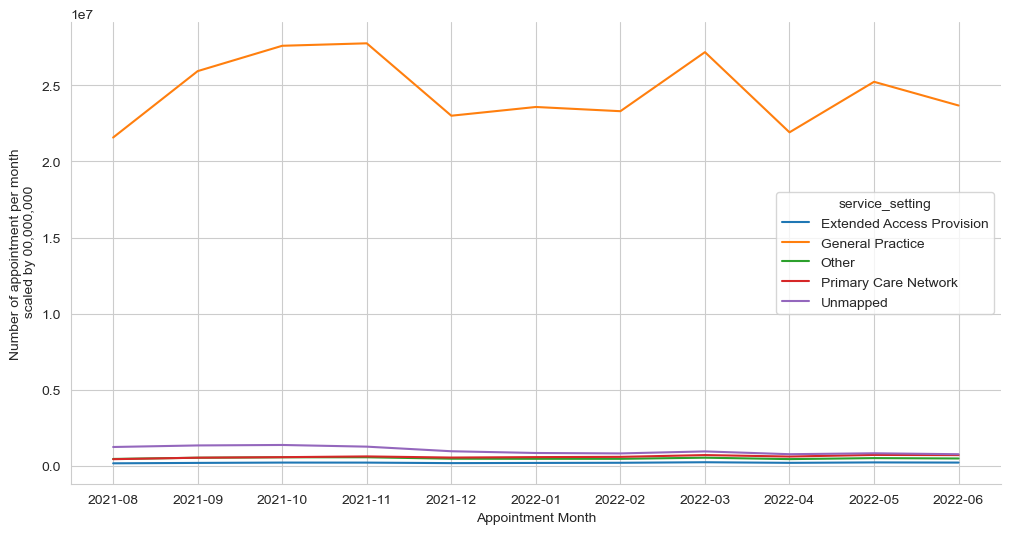

In [383]:
fig, ax = plt.subplots(figsize=(12,6))
                       
sns.set_style("whitegrid")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of appointment per month\n scaled by 00,000,000")

sns.lineplot(nc_ss, x=nc_ss.index, y="count_of_appointments", hue="service_setting")
sns.despine()

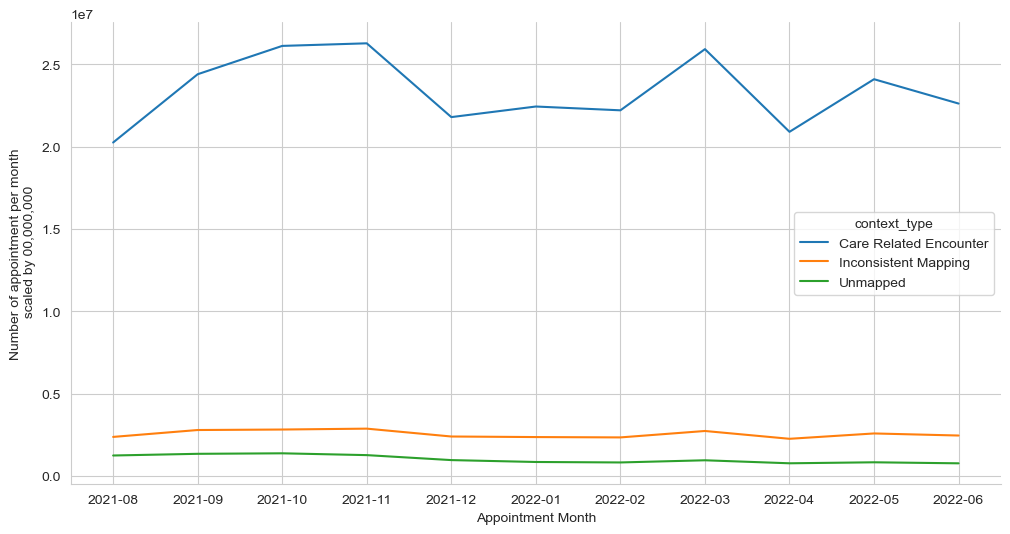

In [384]:
fig, ax = plt.subplots(figsize=(12,6))
                       
sns.set_style("whitegrid")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of appointment per month\n scaled by 00,000,000")

sns.lineplot(nc_ct, x=nc_ct.index, y="count_of_appointments", hue="context_type")
sns.despine()

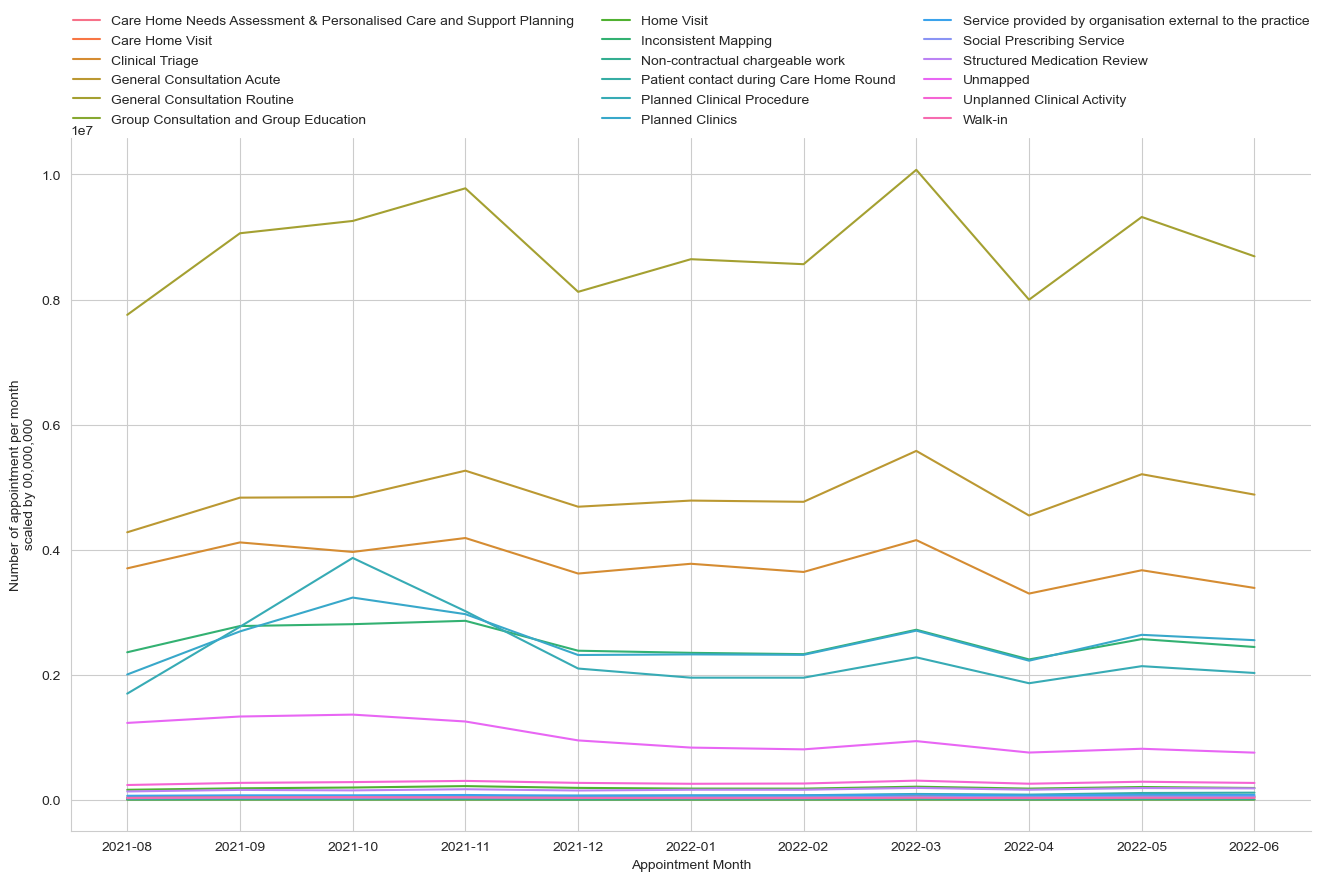

In [427]:
fig,ax= plt.subplots(figsize = (16,9))
sns.set_style("whitegrid")
sns.color_palette('bright')
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of appointment per month\n scaled by 00,000,000")

ax = sns.lineplot(nc_nc, x=nc_nc.index, y="count_of_appointments", 
             hue="national_category")

sns.move_legend(ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)

sns.despine()

In [9]:
# What are the five locations with the highest number of records?

total_appointment = nc.groupby("icb_location")[["count_of_appointments"]]\
                    .agg(sum)\
                    .sort_values(by="count_of_appointments", ascending=False)\
                    .iloc[0:5]
total_appointment.rename(columns={"count_of_appointments":"sum_of_appointments"})

,sum_of_appointments
icb_location,
North East and North Cumbria,16882235
West Yorkshire,14358371
Greater Manchester,13857900
Cheshire and Merseyside,13250311
North West London,12142390


In [11]:
print("There are {0} types of appointment status:"
      .format(len(ar["appointment_status"]
                  .unique())))
print(ar["appointment_status"].unique())

There are 3 types of appointment status:
['Attended' 'DNA' 'Unknown']


In [12]:
# Due to an issue with the data collection, DNA appointments were not captured correctly 
# after June 2018 and are under-reported until and including November 2018 for all 
# practices using the TPP SystmOne system.

# Since the appointment_month column was a string dtype, parse it into datetime format
from datetime import datetime
ar["appointment_month"]=pd.to_datetime(ar["appointment_month"])

# Display with YYYY-MM format
ar["appointment_month"] = ar["appointment_month"].dt.strftime('%Y-%m')

ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [13]:
# Check the range of appointment_month
print("The appointment_month in the dataset ranged from"
      ,ar["appointment_month"].min(),
      "to",  ar["appointment_month"].max())

The appointment_month in the dataset ranged from 2020-01 to 2022-06


In [14]:
monthly_appointment = ar.groupby("appointment_month")["count_of_appointments"].sum()

In [15]:
[monthly_appointment.idxmax(),monthly_appointment.max()]

['2021-11', 30405070]

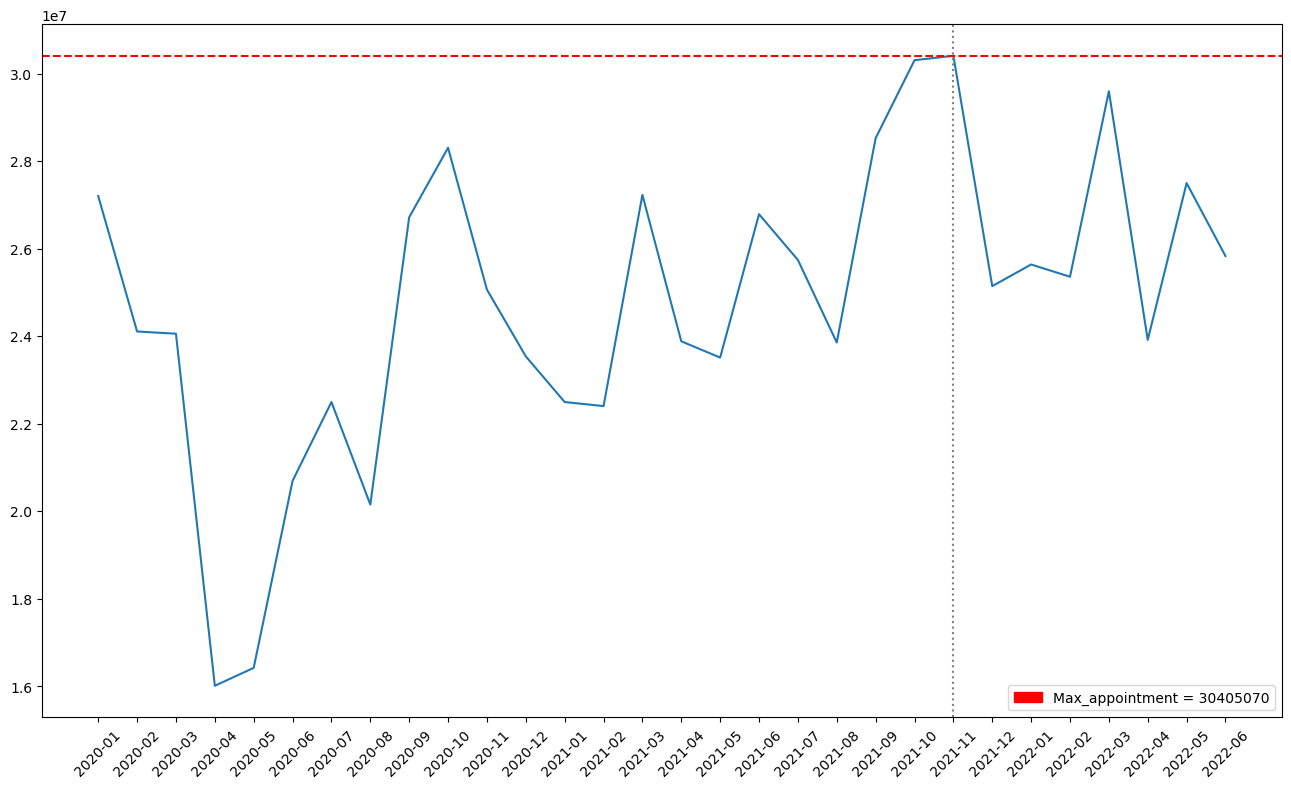

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig,ax = plt.subplots(figsize=(16,9))
plt.xticks(rotation=45)

ax.plot(monthly_appointment)

# set Title and axis labels
ax.set_title("Appointment Trend from 2020-2022")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Count of Appointment")

# Add annotation lines.
plt.axhline(y=monthly_appointment.max(),color='r', label="Maximum Count", linestyle='--')
plt.axvline(x=monthly_appointment.idxmax(), color='grey', linestyle=':')

red_patch = mpatches.Patch(color='red', label='Max_appointment = 30405070')

plt.legend(handles=[red_patch])

In [103]:
import pandas as pd

ad = pd.read_csv('actual_duration.csv')
print(ac.shape)
print(ac.dtypes)
print(ac.columns)
ad.head()


(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [104]:
# Check if any na in the dataframe
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [105]:
ad["appointment_date"] = pd.to_datetime(ad['appointment_date'])
ad.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [106]:
# Check with data if starting from December 2021 (from metadata)
ad["appointment_date"].min()

Timestamp('2021-12-01 00:00:00')

In [107]:
# Check attributes of the actual duration columns
ad["actual_duration"].unique()

array(['31-60 Minutes', '21-30 Minutes', '6-10 Minutes',
       'Unknown / Data Quality', '16-20 Minutes', '11-15 Minutes',
       '1-5 Minutes'], dtype=object)

In [200]:
# Missing Actual Data Exploration
ad_missing = ad[ad["actual_duration"].str.contains("Unknown / Data Quality")]
print(ad_missing.shape)
ad_missing.head()

(20161, 8)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
8,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-02,Unknown / Data Quality,1391
17,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-03,Unknown / Data Quality,1237
24,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-04,Unknown / Data Quality,41
34,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-06,Unknown / Data Quality,1502


In [207]:
missing = ad_missing.groupby("sub_icb_location_name").sum().sort_values(by="count_of_appointments", ascending=False).head(20)

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\1573387417.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  missing = ad_missing.groupby("sub_icb_location_name").sum().sort_values(by="count_of_appointments", ascending=False).head(20)


In [217]:
missing_rate = pd.merge(missing, total_appointments_geo, 
                        how='outer', 
                        on='sub_icb_location_name',
                        suffixes=('_missing','_total')
                       )
missing_rate.head()

,count_of_appointments_missing,count_of_appointments_total
sub_icb_location_name,,
NHS North East London ICB - A3A8R,1831258.0,5341883
NHS North West London ICB - W2U3Z,1746794.0,6976986
NHS North Central London ICB - 93C,1393313.0,3795250
NHS Kent and Medway ICB - 91Q,1345784.0,5209641
NHS South East London ICB - 72Q,1329138.0,4360079


In [220]:
# Calculate the rate of missing data per center location in percentage
missing_rate["missing_rate(%)"] = missing_rate["count_of_appointments_missing"]/missing_rate["count_of_appointments_total"]*100

In [230]:
# exploring the findings
print(missing_rate["missing_rate(%)"].describe())
missing_rate.sort_values(by="missing_rate(%)", ascending =False).head(20)

count    20.000000
mean     25.501812
std       4.825447
min      18.083969
25%      21.942698
50%      25.595355
75%      27.416317
max      36.712022
Name: missing_rate(%), dtype: float64


,count_of_appointments_missing,count_of_appointments_total,missing_rate(%)
sub_icb_location_name,,,
NHS North Central London ICB - 93C,1393313.0,3795250,36.712022
NHS North East London ICB - A3A8R,1831258.0,5341883,34.281133
NHS South East London ICB - 72Q,1329138.0,4360079,30.484264
NHS Black Country ICB - D2P2L,1148089.0,3901431,29.427382
NHS Bristol North Somerset and South Gloucestershire ICB - 15C,784101.0,2756491,28.445622
NHS Cheshire and Merseyside ICB - 27D,574652.0,2122585,27.073215
NHS West Yorkshire ICB - 36J,619426.0,2348208,26.378668
NHS Surrey Heartlands ICB - 92A,729398.0,2789898,26.144253
NHS Kent and Medway ICB - 91Q,1345784.0,5209641,25.832567


INSIGHT
- THE COUNT OF MISSING ENTRY FOR THE ACTUAL DURATION WAS ONLY 20 AND NOT A UNIVERSAL PROBLEM ACROSS THE NETWORKS
- THIS ISSUE WAS EXPLAINED IN MATADATA FILE

C. DATA CLEANING

In [108]:
# Replace Unknown / Data Quality by creating a new subset without this entry
ad_subset = ad[ad["actual_duration"]!= 'Unknown / Data Quality']
ad_subset["actual_duration"] = ad_subset["actual_duration"].str.replace("Minutes", "")

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\3747379152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["actual_duration"] = ad_subset["actual_duration"].str.replace("Minutes", "")


In [109]:
# Calculate the actual duration with a median minute-time of each group in it
start=[]
end =[]
for i in ad_subset["actual_duration"]:
    i = i.split("-")
    start += [i[0]]
    end += [i[1]]

# specify new columns as start and end
ad_subset["appointment_start"] = start
ad_subset["appointment_end"] = end

# Change the type of the data from string to float
ad_subset["appointment_start"]= ad_subset["appointment_start"].astype('float')
ad_subset["appointment_end"] = ad_subset["appointment_end"].astype('float')

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\1244304274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["appointment_start"] = start
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\1244304274.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["appointment_end"] = end
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\1244304274.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [110]:
ad_subset["tag_actual_duration"]= ad_subset["appointment_start"]+ (ad_subset["appointment_end"] - ad_subset["appointment_start"])/2

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2504118777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["tag_actual_duration"]= ad_subset["appointment_start"]+ (ad_subset["appointment_end"] - ad_subset["appointment_start"])/2


In [231]:
ad_subset.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_start,appointment_end,tag_actual_duration,daily_total_duration
0,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,31-60,364,31.0,60.0,45.5,16562.0
1,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,21-30,619,21.0,30.0,25.5,15784.5
2,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,6-10,1698,6.0,10.0,8.0,13584.0
4,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,16-20,730,16.0,20.0,18.0,13140.0
5,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,11-15,1073,11.0,15.0,13.0,13949.0


In [294]:
ad_subset[ad_subset["sub_icb_location_name"].str.contains("North East and North Cumbria")]

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_start,appointment_end,tag_actual_duration,daily_total_duration
0,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,31-60,364,31.0,60.0,45.5,16562.0
1,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,21-30,619,21.0,30.0,25.5,15784.5
2,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,6-10,1698,6.0,10.0,8.0,13584.0
4,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,16-20,730,16.0,20.0,18.0,13140.0
5,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,11-15,1073,11.0,15.0,13.0,13949.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121309,99C,E38000127,North East and North Cumbria - 99C,E54000050,E40000012,2022-06-30,6-10,722,6.0,10.0,8.0,5776.0
121310,99C,E38000127,North East and North Cumbria - 99C,E54000050,E40000012,2022-06-30,21-30,400,21.0,30.0,25.5,10200.0
121312,99C,E38000127,North East and North Cumbria - 99C,E54000050,E40000012,2022-06-30,31-60,191,31.0,60.0,45.5,8690.5
121313,99C,E38000127,North East and North Cumbria - 99C,E54000050,E40000012,2022-06-30,11-15,629,11.0,15.0,13.0,8177.0


In [297]:
len(ad_subset["icb_ons_code"].unique())

42

In [113]:
# Now we can calculate the total estimate of resource for spent on appointment 
# for each center on each date
ad_subset["daily_total_duration"] = ad_subset["tag_actual_duration"] * ad_subset["count_of_appointments"]
ad_subset.head()

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2972304305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["daily_total_duration"] = ad_subset["tag_actual_duration"] * ad_subset["count_of_appointments"]


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_start,appointment_end,tag_actual_duration,daily_total_duration
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60,364,31.0,60.0,45.5,16562.0
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30,619,21.0,30.0,25.5,15784.5
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10,1698,6.0,10.0,8.0,13584.0
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20,730,16.0,20.0,18.0,13140.0
5,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,11-15,1073,11.0,15.0,13.0,13949.0


In [119]:
# shortening the sub-icb location name for better readibility
import re
ad_subset['sub_icb_location_name'] = ad_subset['sub_icb_location_name'].str.replace('(NHS)|(ICB\s)', "", regex=True)
ad_subset.head()

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2899100009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset['sub_icb_location_name'] = ad_subset['sub_icb_location_name'].str.replace('(NHS)|(ICB\s)', "", regex=True)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_start,appointment_end,tag_actual_duration,daily_total_duration
0,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,31-60,364,31.0,60.0,45.5,16562.0
1,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,21-30,619,21.0,30.0,25.5,15784.5
2,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,6-10,1698,6.0,10.0,8.0,13584.0
4,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,16-20,730,16.0,20.0,18.0,13140.0
5,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,11-15,1073,11.0,15.0,13.0,13949.0


In [298]:
ad_cleaned = pd.DataFrame(ad_subset, columns =
                          ['icb_ons_code',
                           'sub_icb_location_name',
                           'appointment_date',
                           'actual_duration',
                           'daily_total_duration'])

In [299]:
ad_cleaned.set_index('appointment_date', drop=True, inplace=True)

In [300]:
regional_count = ad_cleaned.groupby(['icb_ons_code',"actual_duration"]).resample('M').sum()

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2757272805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regional_count = ad_cleaned.groupby(['icb_ons_code',"actual_duration"]).resample('M').sum()
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2757272805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regional_count = ad_cleaned.groupby(['icb_ons_code',"actual_duration"]).resample('M').sum()
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2757272805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will 

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2757272805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regional_count = ad_cleaned.groupby(['icb_ons_code',"actual_duration"]).resample('M').sum()
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2757272805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regional_count = ad_cleaned.groupby(['icb_ons_code',"actual_duration"]).resample('M').sum()
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_7380\2757272805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will 

In [301]:
regional_count.reset_index(inplace=True)
regional_count.set_index('appointment_date', drop=True)

,icb_ons_code,actual_duration,daily_total_duration
appointment_date,,,
2021-12-31,E54000008,1-5,504240.0
2022-01-31,E54000008,1-5,473562.0
2022-02-28,E54000008,1-5,470154.0
2022-03-31,E54000008,1-5,552672.0
2022-04-30,E54000008,1-5,445119.0
...,...,...,...
2022-02-28,E54000062,6-10,826944.0
2022-03-31,E54000062,6-10,957216.0
2022-04-30,E54000062,6-10,754008.0


In [302]:
# Rename the columns
regional_count.rename(columns={"actual_duration":"duration_class",
                               "daily_total_duration":"SUM_Duration(mins)"},
                      inplace=True)

In [303]:
regional_count

,icb_ons_code,duration_class,appointment_date,SUM_Duration(mins)
0,E54000008,1-5,2021-12-31,504240.0
1,E54000008,1-5,2022-01-31,473562.0
2,E54000008,1-5,2022-02-28,470154.0
3,E54000008,1-5,2022-03-31,552672.0
4,E54000008,1-5,2022-04-30,445119.0
...,...,...,...,...
1759,E54000062,6-10,2022-02-28,826944.0
1760,E54000062,6-10,2022-03-31,957216.0
1761,E54000062,6-10,2022-04-30,754008.0
1762,E54000062,6-10,2022-05-31,874568.0


In [304]:
regional_count.set_index("appointment_date", drop=True)

,icb_ons_code,duration_class,SUM_Duration(mins)
appointment_date,,,
2021-12-31,E54000008,1-5,504240.0
2022-01-31,E54000008,1-5,473562.0
2022-02-28,E54000008,1-5,470154.0
2022-03-31,E54000008,1-5,552672.0
2022-04-30,E54000008,1-5,445119.0
...,...,...,...
2022-02-28,E54000062,6-10,826944.0
2022-03-31,E54000062,6-10,957216.0
2022-04-30,E54000062,6-10,754008.0
